In [1]:
import numpy as np
from scipy.stats import t
def make_t(X,Y):
    n = len(X)
    m = len(Y)
    muxhat = sum(X) / n
    muyhat = sum(Y) / m
    sigmax = 0
    sigmay = 0
    for i in range(n):
        a = (X[i] - muxhat) ** 2
        sigmax += a
    for i in range(m):
        a = (Y[i] - muyhat) ** 2
        sigmax += a
    sigma_nijou = (sigmax + sigmay) / (n+m-2)
    sigmahat = np.sqrt(sigma_nijou)
    return (muxhat - muyhat) / ( sigmahat * np.sqrt(1/n + 1/m) )
X = [0.48, -0.32, 1.04, 0.86, 0.53]
Y = [-1.64, -1.23, -0.28, 0.14, 0.67]
make_t(X,Y)

2.023749161075337

In [2]:
from scipy.stats import t
n = len(X)
m = len(Y)
t1 = make_t(X,Y)
p = t.cdf(-abs(t1), n+m-2) + ( 1-t.cdf(abs(t1), n+m-2) )
print(p)

0.07760607018849754


In [3]:
from scipy.stats import t
def t_test(X, mu_shita):
    n = len(X)
    muhat = sum(X) / n
    sigma = 0
    for i in range(n):
        a = (X[i]-muhat) ** 2
        sigma += a
    sigma = np.sqrt(sigma / (n-1) ) 
    T = (muhat - mu_shita) * np.sqrt(n) / sigma
    return t.cdf(-abs(T), n-1) + ( 1-t.cdf(abs(T), n-1) )

In [4]:
count = 0
for i in range(100):
    data = np.random.randn(30)
    p = t_test(data, 0)
    if p <= 0.05:
        count += 1
print(count)

8


In [5]:
count = 0
n = 30
for i in range(100):
    data = np.random.normal(loc=1.0, scale=1.0, size=n)
    p=t_test(data, 0)
    if p < 0.05:
        count += 1
print(count)

100


Text(0, 0.5, 'count')

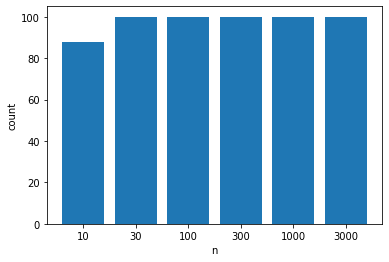

In [6]:
%matplotlib inline
import numpy as np
from scipy.stats import t 
import matplotlib.pyplot as plt
n = [10, 30, 100, 300, 1000, 3000]
result = []
for x in range(len(n)):
    count = 0
    for i in range(100):
        data = np.random.normal(loc=1.0, scale=1.0, size=n[x])
        p=t_test(data, 0)
        if p <= 0.05:
            count += 1
    result.append(count)
legend = ["10","30","100","300","1000","3000"]
x = range(0,6)
plt.bar(x,result,tick_label=legend)
plt.xlabel("n")
plt.ylabel("count")

Text(0, 0.5, 'count')

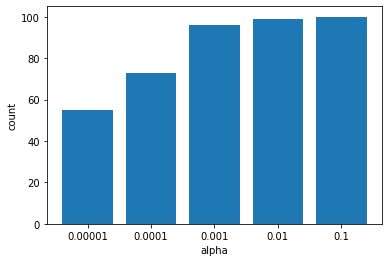

In [7]:
%matplotlib inline
import numpy as np
from scipy.stats import t 
import matplotlib.pyplot as plt
alpha = [0.00001,0.0001,0.001,0.01,0.1]
result = []
n=30
for i in range(len(alpha)):
    count = 0
    for j in range(100):
        data = np.random.normal(loc=1.0, scale=1.0, size=n)
        p=t_test(data, 0)
        if p <= alpha[i]:
            count += 1
    result.append(count)
legend = ["0.00001","0.0001","0.001","0.01","0.1"]
x = range(0,5)
plt.bar(x,result,tick_label=legend)
plt.xlabel("alpha")
plt.ylabel("count")

Text(0, 0.5, 'count')

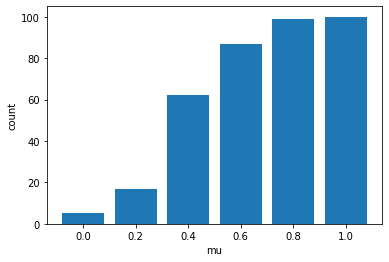

In [8]:
%matplotlib inline
import numpy as np
from scipy.stats import t 
import matplotlib.pyplot as plt

alpha = [0.00001,0.0001,0.001,0.01,0.1]
result = []
n=30
alpha = 0.05
mu = [0.0,0.2,0.4,0.6,0.8,1.0]
for i in range(len(mu)):
    count = 0
    for j in range(100):
        data = np.random.normal(loc=mu[i], scale=1.0, size=n)
        p=t_test(data, 0)
        if p <= alpha:
            count += 1
    result.append(count)
legend = ["0.0","0.2","0.4","0.6","0.8","1.0"]
x = range(0,6)
plt.bar(x,result,tick_label=legend)
plt.xlabel("mu")
plt.ylabel("count")